# Transformers

SEOYEON CHOI  
5/28/23

> Attention is all you need

ref: [딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/31379),
[Attention is all you
need](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

$\star$ seq2seq 구조인 인코더-디코더를 따르면서 어텐션만으로 구현한
모델, RNN을 사용하지 않고 인코더-디코더 구조로 설계하였지만 RNN보다
우수한 성능을 보임

In [ ]:
https://github.com/huggingface/transformers

In [ ]:
https://github.com/huggingface/transformers/blob/main/README_ko.md

# seq2seq 의 한계

-   인코더, 디코더로 구성되어 있는 seq2seq

-   인코더는 입력 시퀀스를 하나의 벡터 표현으로 압축

    -   $\to$ 입력 시퀀스의 정보가 일부 손실된다는 단점 존재
    -   $\to$ 이를 위해 어텐션 메카니즘 등장

-   디코더는 이 벡터 표현을 통해 출력 시퀀스를 만듦

-   $\star$ 어텐션을 RNN의 보정을 위한 용도로 사용하는 것이 아니라
    어텐션만으로 인코더와 디코더를 만든다면??

# 트랜스포머의 주요 하이퍼파라미터

각 값은 논문의 설정으로서, 바뀔 수 있음

$d_{model} = 512$

-   인코더와 디코더에서의 정해진 입력 및 출력의 크기
-   임베딩 벡터의 차원도 이와 같음
-   각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼 때도 유지

$num_layers = 6$

-   하나의 인코더와 디코더를 층으로 생각하였을때, 모델에서 인코더와
    디코더가 몇 층으로 구성되어 있는지를 의미

$num_heads = 8$

-   어텐션을 병렬로 수행하고 결과값을 다시 합치는 방식을 수행하기 위함,
    즉 병렬의 개수

$d_{ff} = 2048$

-   트랜스포머 내부에 피드 포워드 신경망이 존재, 그 신경망의 은닉층의
    크기를 의미
-   단, 피드 포워드 신경망의 입력층과 출력층의 크기는 $d_{model}$

# Transformer

-   인코더-디코더 구조를 가진 트랜스포머
-   인코더와 디코더라는 단위가 N개로 구성되는 구조 $\to$ Encoders,
    Decoders로 표현
    -   seq2seq에서는 인코더와 디코더에서 각각 하나의 RNN이 t개의
        시점time step을 가지는 구조

-   symbol인 sos를 입력받아 eos symbol 나올때까지 연산을 진행하는, RNN을
    사용하지 않지만 인코더 디코더 구조 유지되는 모습을 보임

## Positional Encoding

> **Note**
>
> RNN이 자연어 처리에서 유용했던 이유
>
> -   단어의 위치에 따라 단어를 순차적으로 입력받아서 처리하는 RNN의
>     특성으로 인해 각 단어의 위치 정보 position information을 가질 수
>     있어서

**포지셔널 인코딩**

-   트랜스포머는 단어의 위치 정보를 얻기 위해서 각 단어의 임베딩 벡터에
    위치 정보들을 더하여 모델의 입력으로 사용

-   입력으로 사용되는 임베딩 벡터들이 트랜스포머의 입력으로 사용되기
    전에 포지셔널 인코딩 값이 더해지는 과정

$$PE_{(pos, 2i)} = \sin(pos/10000^{2i/d_{model}})$$

$$PE_{(pos, 2i+1)} = \cos(pos/10000^{2i/d_{model}})$$

-   트랜스포머가 위치 정보를 가진 값을 만들기 위해 사용하는 두 개의 함수

In [44]:
import numpy as np
import pandas as pd

In [47]:
d_model = pd.DataFrame(np.empty((4, 4), dtype=str), index=['I', 'am', 'a', 'student'])

values = ['pos1,i1', 'pos1,i2', 'pos1,i3', 'pos1,i4',
          'pos2,i1', 'pos2,i2', 'pos2,i3', 'pos2,i4',
          'pos3,i1', 'pos3,i2', 'pos3,i3', 'pos3,i4',
          'pos4,i1', 'pos4,i2', 'pos4,i3', 'pos4,i4']

for i in range(4):
    for j in range(4):
        d_model.iloc[i, j] = values[i * 4 + j]

In [48]:
d_model

,0,1,2,3
I,"pos1,i1","pos1,i2","pos1,i3","pos1,i4"
am,"pos2,i1","pos2,i2","pos2,i3","pos2,i4"
a,"pos3,i1","pos3,i2","pos3,i3","pos3,i4"
student,"pos4,i1","pos4,i2","pos4,i3","pos4,i4"


-   pos는 입력 문장에서 임베딩 벡터의 위치
-   i는 임베딩 벡터 내의 차원의 인덱스를 의미
-   위 식에 따르면
    -   **짝수**면 *sin*함수 사용 $\to$ (pos,2i)
    -   **홀수**면 *cos*함수 사용 $\to$ (pos,2i+1)
-   여기서 $d_{model}$은 트랜스포머의 모든 층의 출력 차원을 의미하는
    하이퍼파라미터
-   임베딩 벡터도 같은 차원임
-   이와 깉은 포지셔널 인코딩 방법을 사용하면 순서 정보가 보존됨.
    -   **각 임베딩 멕터에 포지셔널 인코딩의 값을 더하면(차원 같음!)
        같은 단어라도 문장 내의 위치에 따라 트랜스포머의 입력으로
        들어가는 임베딩 벡터의 값이 달라짐**

In [57]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [58]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])

        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        angle_rads = np.zeros(angle_rads.shape)
        angle_rads[:, 0::2] = sines
        angle_rads[:, 1::2] = cosines
        pos_encoding = tf.constant(angle_rads)
        pos_encoding = pos_encoding[tf.newaxis, ...]

        print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

포지셔널 인코딩 행렬 시각화

(1, 50, 128)

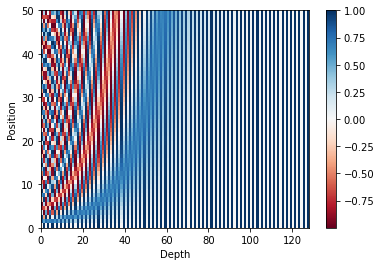

In [60]:
# 문장의 길이 50, 임베딩 벡터의 차원 128
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

# Attention

**Encoder Self-Attention**

-   인코더에서 이루어짐
-   Query = Key = Value(값이 같다는 말이 아님)

**Masked Decoder Self-Attention**

-   디코더에서 이루어짐
-   Query = Key = Value(값이 같다는 말이 아님)

**Encoder-Decoder Attention**

-   디코더에서 이루어짐
-   Query = 디코더 벡터, Key = Value = 인코더 벡터

> **Important**
>
> 셀프 어텐션은 Query, Key, Value가 동일한 경우를 말함
>
> Encoder-Decoder Attention의 경우 Query가 디코더의 벡터인 반면에 Key와
> Value가 인코더의 벡터이므로 셀프 어텐션이라고 부르지 않음
>
> **여기서 Query, Key 등이 같다는 것은 벡터의 값이 같다는 것이 아닌
> 벡터의 출처가 같다는 의미**

위(각각 하나의 층으로 봄)의 인코더, 디코더가 num_layer지정한 수만큼 있음

# Encoder

-   하나의 인코더 층은 크게 두 개의 서브층sublayer로 나뉨
    -   셀프 어텐션 Self Attention
    -   피드 포워드 신경망 Feed Forward Neural Network

> **Tip**
>
> **Multi-head Self Attention**
>
> -   셀프 어텐션을 병렬적으로 사용하였다는 의미
>
> **Position-wise FFNN**
>
> -   순방향신경망

# Self Attention of Encoder

> **Note**
>
> Remind
>
> -   어텐션 함수는 주어진 Query에 대해 모든 Key와의 유사도를 구함
> -   유사도를 가중치로 하여 Key와 맴핑되어 있는 각각의 Value에 반영해
>     좀
> -   이 유사도가 반영된 Value를 모두 가중합하여 Return

-   seq2seq에서의 Q,K,V의 정의
    -   Q = Query, t 시점의 디코더 셀에서의 은닉상태
    -   K = Key, 모든 시점의 인코더 셀의 은닉상태들
    -   V = Value, 모든 시점의 인코더 셀의 은닉상태들

$\to$ t 시점의\~의 의미는 변하면서 반복적으로 쿼리 수행하니까 결국은
전체 시점에 대해서 일반화 가능

-   seq2seq에서의 Q,K,V의 정의
    -   Q = Query, 모든 시점의 디코더 셀에서의 은닉상태들
    -   K = Key, 모든 시점의 인코더 셀의 은닉상태들
    -   V = Value, 모든 시점의 인코더 셀의 은닉상태들

## 1. Self Attention

-   *셀프 어텐션*
    -   Q = 입력 문장의 모든 단어 벡터들
    -   K = 입력 문장의 모든 단어 벡터들
    -   V = 입력 문장의 모든 단어 벡터들
-   **연속된 문장들에 대하여 지칭하는 단어가 다르지만 의미는 같을 수
    있는데, 셀프 어텐션은 이 유사도를 구하여서 연관 가능성을 찾아낸다.**

## 2. Q, K, V

-   셀프 어텐션은 일단 문장의 각 단어 벡터로부터 Q벡터, K벡터, V벡터를
    얻음.
    -   Q벡터, K벡터, V벡터는 $d_{model}$ 차원을 가지는 단어 벡터들보다
        더 작은 차원을 가짐
    -   논문을 예로 들면 $d_{model}$의 차원은 512, Q벡터, K벡터, V벡터의
        차원은 각각 64
    -   이 64는 또 다른 하이퍼파라미터인 num_heads로 결정되는데,
        트랜스포머는 $d_{model}$을 num_heads로 나눈 값을 Q벡터, K벡터,
        V벡터의 차원으로 결정.
    -   논문의 num_heads = 8이었으니까 $512/8 = 64$로 결정된 것
    -   이 Q벡터, K벡터, V벡터는 단어마다, 벡터마다 서로 다른 가중치
        행렬을 곱하여 얻음
    -   각 단어마다 Q벡터, K벡터, V벡터 각각의 가중치, Q벡터, K벡터,
        V벡터 각각이 존재하는 것

## 3. Scaled dot-product Attention

각 단어 별로 Q벡터, K벡터, V벡터를 구한 후 각 Q벡터는 모든 K벡터에
대해서 어텐션 스코어를 구하고, 어텐션 분포를 구한 뒤 이를 사용하여 모든
V벡터를 가중합하여 어텐션 값 또는 컨텍스트 벡터를 구함-\> 모든 Q벡터에
대해 반복

-   내적한 후 특정값을 나눔으로써 값을 조정하는 과정 추가한 스케일드
    갓-프로덕트 어텐션

$$score(q,k) = \frac{q k}{\sqrt{n}}$$

$\sqrt{n}$이 결정되는 과정

-   논문을 예로 들면 $d_{model}$의 차원이 512, num_heads가 8, Q,K,V의
    차원 $d_k$가 64(512/8) 이었음, 여기서 64에 root 취한 8으로 결정되는
    것

## 4. 행렬 연산으로 일괄 처리

Q 벡터마다 3을 연산하는 것을 피하기 위함

1.  문장 행렬에 가중치 행렬을 곱하여 Q행렬, K행렬, V행렬을 구한다(단지
    벡터를 행렬화한 것 뿐).
2.  각 단어의 Q벡터와 전치한 K벡터의 내적이 각 행렬의 원소가 되는 행렬을
    결과로 추출.
3.  2번의 결과에 $\sqrt{d_k}$를 나누어 softmax취한 후 V행렬을 곱하여 각
    행과 열이 어텐션 스코어 값을 가지는 행렬을 구함.

$$Attention(Q,K,V) = softmax(\frac{QK^\top}{\sqrt{d_k}})V$$

입력 문장의 길이가 seq_len이라면, 문장 행렬의 크기는
(seq_len,$d_{model}$)

*차원 정리*

-   $Q$ = (seq_len, $d_k)$
    -   $W^Q = (d_{model},d_k)$
-   $K^\top$ = ($d_k$, seq_len)
    -   $W^K = (d_{model},d_k)$
-   $V$ = (seq_len, $d_v)$
    -   $W^V = (d_{model},d_v)$
-   논문에서는 $d_k,d_v$의 차원이 $d_{model}$/num_heads로 같게 설정함
-   attention score matrix = (seq_len, $d_v$)

## 5. Scaled dot-product attention 구현

In [65]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)

    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value)

    return output, attention_weights

scaled_dot_product_attention 실행

In [67]:
# 임의의 Query, Key, Value인 Q, K, V 행렬 생성
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)

query에 해당하는 \[0,10,0\]은 key에 해당하는 두 번째 값과 일치해야 함.

In [68]:
# 함수 실행
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)

두 번째 값과 일치했어서 두 번째가 1인 값을 반환, 결과적으로 \[10,0\]의
어텐션 값 반환

In [71]:
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)

세 번째 값과 네 번째 값이 같이 일치하다면? 합이 1이되게 나눠서 0.5,0.5씩
나눠짐

-   \[100,5\] \* 0.5 + \[1000,6\] \* 0.5 = \[550,5.5\]

In [74]:
[100*0.5 + 1000*0.5,5*0.5 + 6*0.5]

[550.0, 5.5]

In [75]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)

## 6. Multi-head Attention

왜 스케일링하여 어텐션 스코어를 구했을까?

-   논문에서는 한 번의 어텐션보다 여러번의 어텐션을 병렬로 사용하는 것이
    더 효과적이라고 판단
-   그래서 $d_{model}$의 차원을 num_heads로 나누어
    $d_{model}$/num_heads의 차원을 가지는 Q,K,V에 대해서 num_heads 개의
    병렬 어텐션 수행
-   num_heads만큼 병렬이 이뤄지는데, 이 때 나오는 각각의 **어텐션 값
    행렬을 어텐션 헤드**라고 함.
    -   이 때 가중치 행렬의 값$W^Q,W^K,W^V$은 num_heads의 어텐션
        해드마다 전부 다름

병렬로 수행한 효과?

-   어텐션을 병렬로 수행하여 다른 시각으로 정보를 수집할 수 있음

## 7. Multi-head Attention 구현

가중치 행렬

-   Q, K, V 행렬을 만들기 위한 가중치 행렬 $W^Q,W^K,W^V$
-   어텐션 헤드들을 연결concatenation 후에 곱해주는 행렬 $W^O$

가중치 행렬을 곱하는 것은 Dense layer 지나게 하여 구현

1.  $W^Q,W^K,W^V$에 해당하는 $d_{model}$의 크기의 밀집층(Dense layer)을
    지나게 한다.
2.  지정된 헤드수 num_heads 만큼 나눈다(split).
3.  scaled dot-product attention
4.  나눠졌던 헤드들을 연결concatenatetion한다.
5.  $W^O$에 해당하는 밀집층을 지나게 한다.

In [77]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

    # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)

        return outputs

## 8. Padding Mask

어텐션에서 제외하기 위해 값을 가리는 역할

-   방법: 어텐션 스코어 행렬의 마스킹 위치에 매우 작은 음수값을 넣어주기
    -   소프트맥스 함수를 지나면 값이 0이 되어 유사도 구할때 반영되지
        않름.

In [79]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

In [80]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)

# Position-wise Feed Forward Neural Network

인코더와 디코더에서 공통적으로 가지고 있는 서브층

= FFNN(Fully Connected FFNN)

$$FFNN(x) = MAX(0,xW-1 + b_1)W_2 + b_2$$

$x$ -\> $F_1 = xW_1 + b_1$ -\> 활성화 함수:ReLU $F_2 = max(0,F_1)$ -\>
$F_3 = F_2W_2 + b_2$

-   여기서 $x$는 멀티 헤드 어텐션의 결과로 나온 (seq_len, $d_{model}$)의
    차원을 가지는 행렬
-   가중치 행렬 $W_1$ = ($d_{model}, d_{ff}$)
-   가중치 행렬 $W_2$ = ($d_{ff},d_{model}$)
-   논문은 $d_{ff}$를 2048로 정의
-   매개변수 $W_1,W_2,b_1,b_2$는 각 인코더 층마다 동일하게 계산되지만
    값은 층마다 다 다르다.

``` python
# 다음의 코드는 인코더와 디코더 내부에서 사용할 예정입니다.
outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
outputs = tf.keras.layers.Dense(units=d_model)(outputs)
```

# Residual connection and Layer Normalization

## 1. 잔차 연결

$$H(x) = x + F(x)$$

-   $F(x)$는 트랜스포머에서 서브층에 해당
-   즉, 장차 연결은 서브층의 입력과 출력을 더하는 것
-   서브층의 입력과 출력은 동일한 차원을 갖고 있어서 가능
-   그래서 재귀하는 것처럼 다이어그램 그려보면 화살표가 출력층에서 나와
    입력층으로 들어가는 모습
-   *잔차 연결은 컴퓨터 비전 분야에서 주로 사용되는 모델의 학습을 돕는
    기법*

식으로 표현 -\> $x + Sublayer(x)$

서브층이 멀티 헤드 어텐션이었다면 \$H(x) - x + Multi - head Attention(x)

참고 : [잔차연결 관련 논문](https://arxiv.org/pdf/1512.03385.pdf)

## 2. 층 정규화

잔차연결과 층 정규화 모두 수행한 함수

$$LN = LayerNorm(x+Sublayer(x))$$

텐서의 마지막 차원에 대하여 평균과 분산을 구하고, 이를 가지고 어떤
수식을 통해 값을 정규화하여 학습을 도움

-   텐서의 마지막 차원 = 트랜스포머에서는 $d_{model}$ 차원을 의미

1.  평균과 분산을 통한 벡터 $x_i$ 정규화

    -   스칼라인 평균과 분산 도출
    -   $\epsilon$은 분모가 0이 되는 것을 방지

$$\hat{x}_{i,k} = \frac{x_{i,k} - \mu_i}{\sqrt{\sigma^2_i + \epsilon}}$$

1.  감마와 베타 도입

-   LayerNormalization(케라스에 내장되어 있음)

$$ln_i = \gamma \hat{x}_i + \beta = LayerNorm(x_i)$$

참고: [층 정규화 관련 논문](https://arxiv.org/pdf/1607.06450.pdf)

# Encoder 구현

인코더 입력으로 들어가는 문장에는 패딩이 있을 수 있으므로 어텐션 시 패딩
토큰을 제외하도록 패딩 마스크를 사용

-   multiheadattention 함수의 mask 인자값으로 padding_mask가 사용되는
    이유
-   인코더는 두 개의 서브층으로 이루어짐
    -   멀티 헤드 어텐션
    -   피드 포워드 신경망
-   서브층 이후 드롭 아웃, 잔차 연결, 층 정규화 수행

In [86]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

# Encoder 쌓기

In [89]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

인코더 층을 num_layers 만큼 쌓는 클래스

# Encoder에서 Decoder로

인코더에서 num_layers만큼 총 연산을 순차적으로 한 후 마지막 층의
인코더의 출력을 디코더로 전달

# Decoder: Self-Attention and Look-ahead Mask

트랜스포머는 문장 행렬로 입력을 한 번에 받기 때문에 현재 시점의 단어를
예측하고자 할 때 입력 문장 행렬로부터 미래 시점의 단어까지 참고하느
현상이 발생

이를 위해 디코더에서 현재 시점의 예측에서 현재 시점보다 미래에 있는
단어들을 참고하지 못하도록 룩-어헤드 마스크 도입

**디코더의 첫번때 서브층에서 이루어짐**

**디코더의 셀프 어텐션은 인코더의 멀티 헤드 셀프 어텐션과 동일한 연산을
수행하나, 어텐션 스코어 행렬에서 마스킹을 적용하는 점이 다름**

-\> 미리보기 방지를 위함

트랜스포머 마스킹의 종류

1.  인코더의 셀프 어텐션 = 패딩 마스크를 전달
2.  디코더의 첫번째 서브층인 마스크드 셀프 어텐션 = 룩-어헤드 마스크를
    전달
3.  디코더의 두번째 서브층인 인코더-디코더 어텐션 = 패딩 마스크를 전달

In [90]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)

마스킹을 하고자 하는 위치에 1, 마스킹을 하지 않고자 하는 위이에 0을 리턴

In [92]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)

## 2nd Decoder sublayer : Encoder-Decoder Attention

디코더 두번째 서브층은 멀티 헤드 어텐션을 수행한다는 점에서 이전의
어텐션들(인코더와 디코더의 첫번째 서브층)과는 공통점이 있으나 이건
**셀프 어텐션이 아님!**

-   **셀프 어텐션은 Query, Key, Value가 출처가 같은 경우를 말하는데,
    인코더-디코더 어텐션은 Query가 디코더인 행렬인 반면, Key, Value가
    인코더 행렬이기 때문**

-   인코더의 첫번째 서브층 = Query = Key = Value

-   디코더의 첫번째 서브층 = Query = Key = Value

-   디코더의 두번째 서브층 = Query = 디코더 행렬(의 첫번째 서브층 결과),
    Key = Value = 인코더 행렬(의 마지막 층에서 얻은 값)

# Decoder 구현

첫번째 서브층은 mask 인자값으로 look_ahead_mask가 들어가고, 두 번째
서브층은 mask의 인자값으로 padding_mask가 들어가있음

세 개의 서브층 모두 서브층 연산 후에는 드롭 아웃, 잔차 연결, 층 정규화가
수행

In [93]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")

    # 패딩 마스크(두번째 서브층)
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

# Decoder 쌓기

num_layers 개수만큼 쌓기

In [95]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

# Transformer 구현

vocab_size는 다중 클래스 분류 문제를 풀 수 있도록 추가

In [96]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

# Transformer hyperparameter 정하기

예제 - num_layers = 4 \# 인코더,디코더 층의 개수 - $d_{ff}$ = 128 \#
포지션 와이즈 피드 포워드 신경망의 은닉층 - $d_{model}$ = 128 \#
인코더와 디코더의 입, 출력의 차원 - num_heads = 4 \# 멀티-헤드
어텐션에서 병렬적으로 사용할 헤드의 수 - $d_v$ = 128 / 4 = 32

In [97]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

(1, 9000, 128)
(1, 9000, 128)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

# Loss Function 정의

예제가 다중 클래스라 크로스 엔트로피 함수를 손실 함수로 정의함

In [99]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

# 학습률

$$lrate = d^{-0.5}_{model} \times min(step_num^{-0.5} , step_num \times warmup_steps^{-1/4})$$

In [100]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

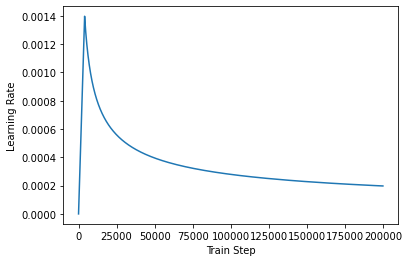

In [101]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")